In [1]:
import pandas as pd
import json
import datetime
from dateutil.parser import parse
import re
import time
from matplotlib import pyplot as plt
import wordcloud,jieba
from PIL import Image
import collections
import numpy as np
from datetime import timezone,timedelta

# 数据预处理

In [2]:
comp = re.compile('</?\w+[^>]*>')
def strip_html(s:str):
    return comp.sub('',s)

In [ ]:
df = pd.read_csv('lwl_raw.csv')
floor_number_list = []
created_at_list = []
text_list = []
user_name_list = []
user_gender_list = []
user_avt_list = []
user_id_list = []
for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    floor_number_list.append(s_dict['floor_number'])
    if i%1000==0:
        print('{}/{}'.format(i+1,df.shape[0]))
        '''
    df['floor_number'][i]=s_dict['floor_number']
    df['created_at'][i]=s_dict['created_at']
    df['text'][i] = s_dict['text']
    df['user_name'][i] = s_dict['user']['screen_name']
    df['user_gender'][i] = s_dict['user']['gender']
    df['user_avt'][i] = s_dict['user']['profile_image_url']
    df['user_id'][i] = s_dict['user']['profile_url'].split('=')[-1]
    if i%1000==0:
        print('1-{}/{}'.format(i+1,df.shape[0]))
        '''
df['floor_nuumber']=floor_number_list
del floor_number_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    created_at_list.append(s_dict['created_at'])
    if i%1000==0:
        print('2-{}/{}'.format(i+1,df.shape[0]))
df['created_at'] = created_at_list
del created_at_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    text_list.append(s_dict['text'])
    if i%1000==0:
        print('3-{}/{}'.format(i+1,df.shape[0]))
df['text'] = text_list
del text_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    user_name_list.append(s_dict['user']['screen_name'])
    if i%1000==0:
        print('4-{}/{}'.format(i+1,df.shape[0]))
df['user_name'] = user_name_list
del user_name_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    user_gender_list.append(s_dict['user']['gender'])
    if i%1000==0:
        print('5-{}/{}'.format(i+1,df.shape[0]))
df['user_gender'] = user_gender_list
del user_gender_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    user_avt_list.append(s_dict['user']['profile_image_url'])
    if i%1000==0:
        print('6-{}/{}'.format(i+1,df.shape[0]))
df['user_avt'] = user_avt_list
del user_avt_list


for i in range(0,df.shape[0]):
    s_dict = json.loads(json.dumps(eval(df.iloc[i][1])))
    user_id_list.append(s_dict['user']['profile_url'].split('=')[-1])
    if i%1000==0:
        print('7-{}/{}'.format(i+1,df.shape[0]))
df['user_id'] = user_id_list
del user_id_list

In [3]:
df_raw = pd.read_csv('lwl_raw.csv')

In [6]:
df_raw.columns[0]
df = df_raw.drop(df_raw.columns[[0,1,2]],axis=1)

In [8]:
df.sort_values(by="floor_nuumber",ascending=True,inplace=True)

In [11]:
print(df.shape)
df_drop = df.drop_duplicates(subset=['floor_nuumber'],keep='first',inplace=False)
print(df_drop.shape)

(899988, 7)
(836689, 7)


In [20]:
df_drop.head()
df_drop.drop(index=(df_drop.loc[(df_drop['floor_nuumber']==0)].index),inplace=True)

In [24]:
df_drop.head()
df_drop.tail()

,floor_nuumber,created_at,text,user_name,user_gender,user_avt,user_id
858829,953461,Sun Jun 21 12:23:22 +0800 2020,亮亮，节日快乐,网个红,m,https://tvax4.sinaimg.cn/crop.0.0.996.996.180/...,6036716472
858828,953462,Sun Jun 21 12:23:27 +0800 2020,李医生父亲节快乐🎉,人生不过是一个轮回,f,https://tvax4.sinaimg.cn/crop.0.0.512.512.180/...,5106420671
858827,953463,Sun Jun 21 12:23:31 +0800 2020,以前的评论看不见了？哎……消灭吐槽的声音就＝消灭了负能量。,天津地产老炮,m,https://tvax1.sinaimg.cn/default/images/defaul...,1681365414
858826,953464,Sun Jun 21 12:23:44 +0800 2020,宋木山：你体内负能量太多啦,蓝玛飞蓬,f,https://tvax1.sinaimg.cn/default/images/defaul...,7056348723
858825,953465,Sun Jun 21 12:24:30 +0800 2020,父亲节快乐！,哈哈陈,m,https://tva3.sinaimg.cn/crop.0.0.180.180.180/5...,1416936310


In [22]:
df_drop.to_csv('lwl-clean.csv',index=False,encoding="utf_8_sig")

In [25]:
del df
df = df_drop

# 数据分析
--- 

## 概览
----

### 男女比

In [34]:
m = df.loc[(df['user_gender']=='m')].shape[0]
f = df.loc[(df['user_gender']=='f')].shape[0]
print(m,f)

310782 525905


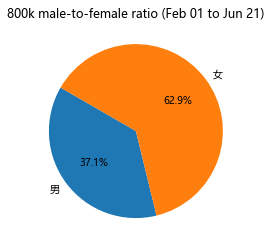

In [52]:
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
labels = ['男','女']
sizes = (m,f)
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title('800k male-to-female ratio (Feb 01 to Jun 21)')
plt.savefig('./img/mf-ratio-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=80,bbox_inches='tight')
plt.show()

----
### 词频与词云

In [37]:
text_col = df['text']
print(text_col.shape)
cut_text = []
for i,text in enumerate(text_col):
    if i%100000==0:
        print('-',end='')
    cut_text.append(jieba.lcut(strip_html(text)))
print(cut_text[2])

(836687,)
---------[]


In [50]:
cut_col_list = [i for j in cut_text for i in j]
punctuation_marks = ['，',',','!','！','。','.','、','~','[',']','【','】',' ']
stop_words = open('stopwords.words','r',encoding='utf-8').read().split('\n')
cut_col_list_stripped = list(filter(lambda x:x not in punctuation_marks,cut_col_list))
cut_col_list_stripped_stopped = list(filter(lambda x:x not in stop_words,cut_col_list_stripped))
all_txt = " ".join(cut_col_list_stripped_stopped)

len(all_txt)

13467446

#### 词频

In [51]:
words_count = collections.Counter(cut_col_list_stripped_stopped)
words_count_top = words_count.most_common(20)
print(words_count_top)
print(len(cut_col_list_stripped_stopped))

[('好', 193393), ('蜡烛', 174030), ('李医生', 154063), ('走', 128026), ('🙏', 117412), ('一路', 86701), ('加油', 71668), ('都', 57842), ('早日康复', 56781), ('希望', 51391), ('？', 45452), ('不', 43294), ('英雄', 42028), ('人', 41093), ('会', 40369), ('…', 38515), ('晚安', 37079), ('还', 30526), ('很', 29640), ('说', 28134)]
4757136


c:\users\nathany\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\nathany\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56911 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\nathany\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128591 missing from current font.
  font.load_char(ord(s), flags=flags)


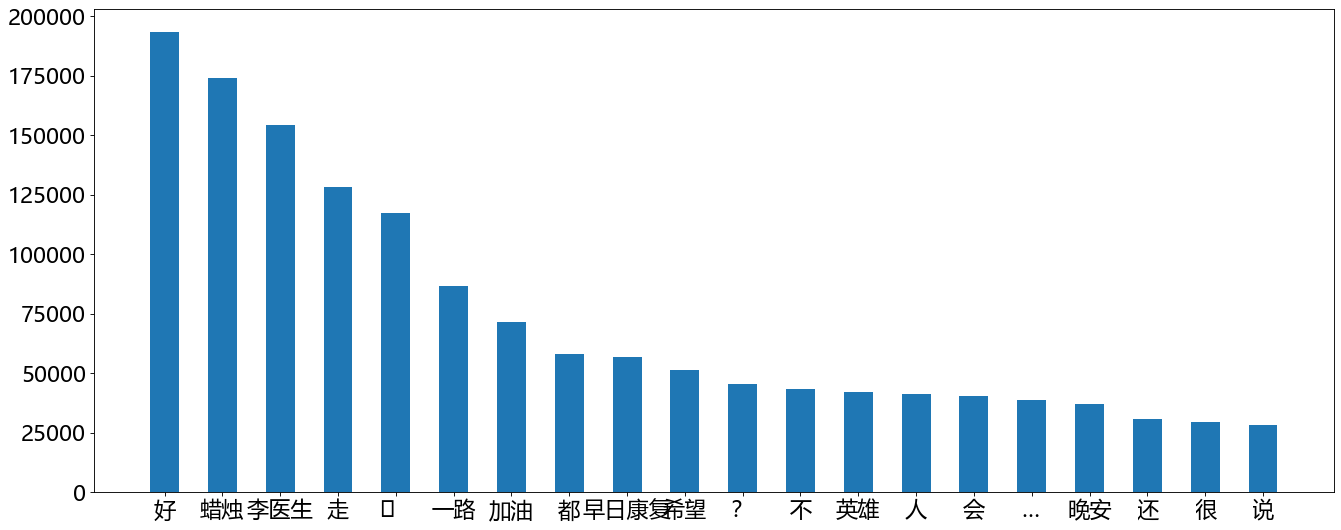

In [53]:
plt.figure(figsize=(20,8),dpi=80)
words = []
count = []
for (w,c) in words_count_top:
    words.append(w)
    count.append(c)
x = range(len(words))
plt.bar(x,count,width=0.5)
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.xticks(x,words)
plt.tick_params(labelsize=20)
plt.savefig('./img/words-freq-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=80,bbox_inches='tight')
plt.show()

#### 词云

In [54]:
w = wordcloud.WordCloud(\
    width = 1000, height = 700,\
    background_color = "white",     font_path = "msyh.ttc",scale=16,collocations=False
)


w.generate_from_text(all_txt)

In [55]:
w.to_file('./img/cloud-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png')

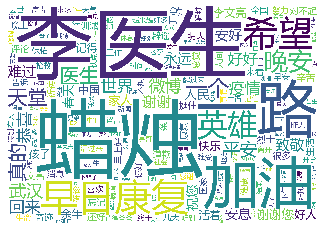

<Figure size 432x288 with 0 Axes>

In [56]:
plt.imshow(w)
plt.axis("off")
plt.figure()
plt.show()

----
## 详细内容

----
### 时间序列分析

#### 评论量——日期

In [58]:
dates = {}
for i in range(0,df.shape[0]):
    if i%100000==0:
        print('->',end='')
    d = parse(df.iloc[i]['created_at']).date().strftime('%m-%d')
    if dates.get(d)==None:
        dates[d]=1
    else:
        dates[d]+=1

->->->->->->->->->

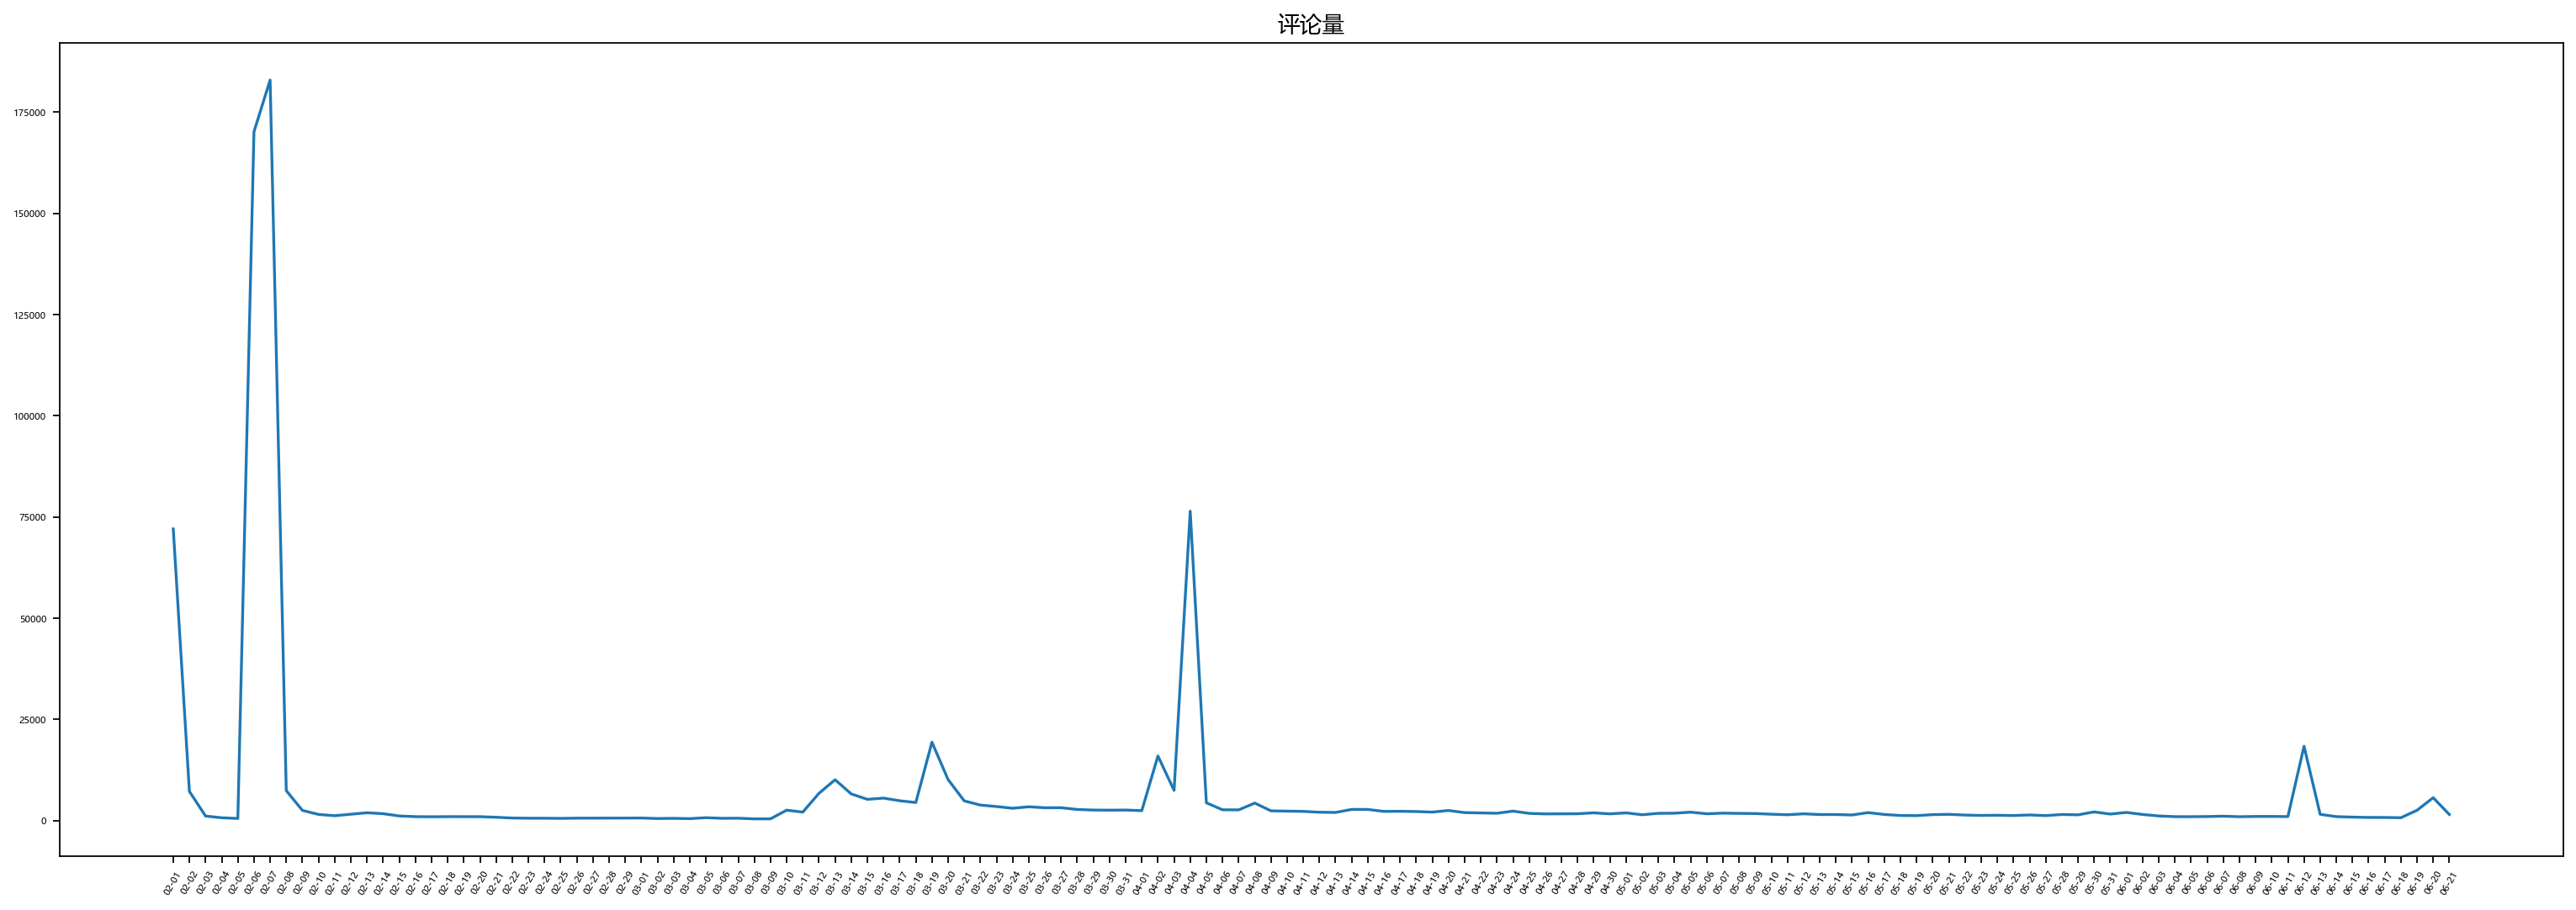

In [62]:
x_data = []
y_data = []
for k in dates:
    x_data.append(k)
    y_data.append(dates[k])
plt.figure(figsize=(24,8),dpi=160)
plt.plot(x_data,y_data)
plt.title('评论量')
plt.xticks(rotation=60)
plt.tick_params(labelsize=5)
plt.savefig('./img/comment-count-daily-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

#### 评论男女比日期变化

In [67]:
dates = {}
m_total = 1
f_total = 1
for i in range(0,df.shape[0]):
    if i%100000==0:
        print('->',end='')
    d = parse(df.iloc[i]['created_at']).date().strftime('%m-%d')
    if df.iloc[i]['user_gender']=='f':
        f_total +=1
    else:
        m_total+=1
    dates[d]=m_total/f_total

->->->->->->->->->

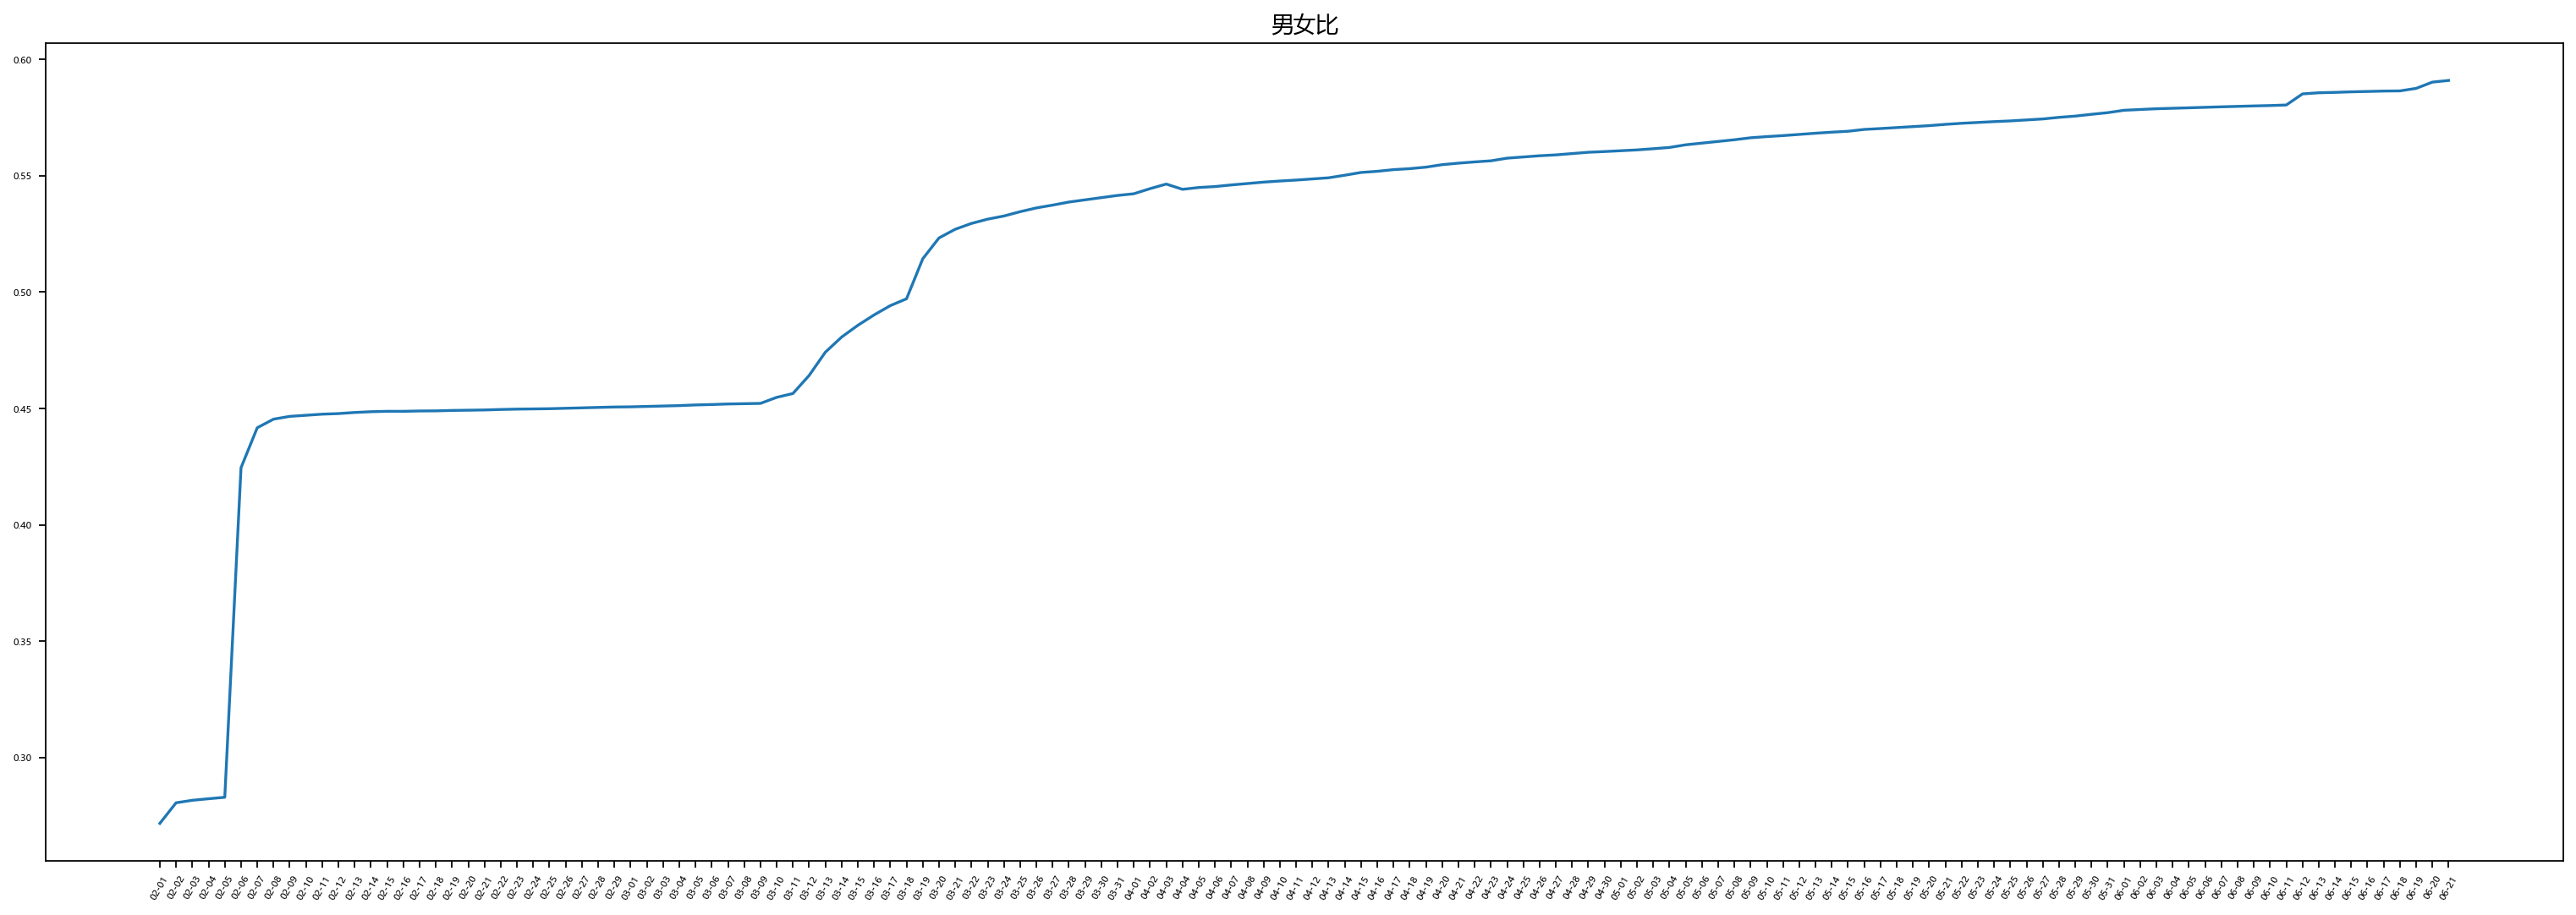

In [68]:
x_data = []
y_data = []
for k in dates:
    x_data.append(k)
    y_data.append(dates[k])
plt.figure(figsize=(24,8),dpi=160)
plt.plot(x_data,y_data)
plt.title('男女比')
plt.xticks(rotation=60)
plt.tick_params(labelsize=5)
plt.savefig('./img/mf-ratio-daily-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

#### 评论&男女比小时变化

In [69]:
hours = {}
for i in range(0,df.shape[0]):
    if i%100000==0:
        print('->',end='')
    d = parse(df.iloc[i]['created_at'])
    d = d +timedelta(hours=8)
    h_str = d.astimezone(timezone.utc).strftime('%H')
    if hours.get(h_str)==None:
        hours[h_str]={'m':1,'f':1,'m_total':1,'f_total':1}
    else:
        hours[h_str][df.iloc[i]['user_gender']]+=1
        hours[h_str][df.iloc[i]['user_gender']+'_total']+=1

->->->->->->->->->

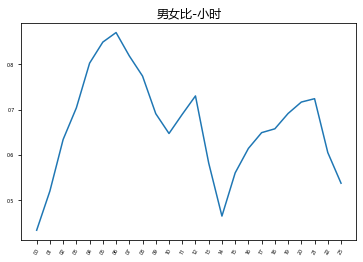

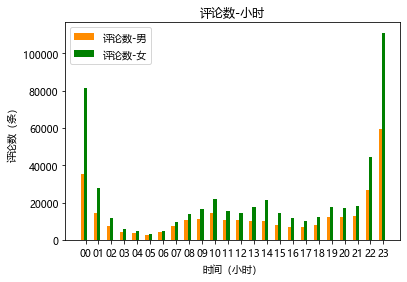

In [71]:
x_data = []
y_data = []
m_data = []
f_data = []
for k in hours:
    x_data.append(k)
    y_data.append(hours[k]['m']/hours[k]['f'])
    m_data.append(hours[k]['m_total'])
    f_data.append(hours[k]['f_total'])
'''
x_data.reverse()
y_data.reverse()
f_data.reverse()
m_data.reverse()
'''
index_0 = x_data.index('00')
x_data = x_data[index_0:]+x_data[0:index_0]
y_data = y_data[index_0:]+y_data[0:index_0]
f_data = f_data[index_0:]+f_data[0:index_0]
m_data = m_data[index_0:]+m_data[0:index_0]


plt.plot(x_data,y_data)
plt.title('男女比-小时')
plt.xticks(rotation=60)
plt.tick_params(labelsize=5)
plt.savefig('./mf-ratio-hour-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

width=0.25
index = np.arange(len(x_data))
plt.bar(index,m_data,width=width,label='评论数-男',color='darkorange')
plt.bar(index+width,f_data,width=width,label='评论数-女',color='green',tick_label=x_data)
plt.xticks()
plt.xlabel('时间（小时）')
plt.ylabel('评论数（条）')
plt.title('评论数-小时')
plt.legend()
plt.savefig('./img/mf-count-hour-'+str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))+'.png',dpi=160,bbox_inches='tight')
plt.show()

### 多次评论

In [72]:
id_list = list(df['user_id'])
cnt = collections.Counter()
for id in id_list:
    cnt[id]+=1
#id_count = collections.Counter(id_list)
b50,b25,b5 = 0,0,0
for id in cnt:
    if cnt[id]>50:
        b50+=1
    elif cnt[id]>25:
        b25+=1
    elif cnt[id]>5:
        b5+=1
print(b50,b25,b5)

print(len(id_list),"->",len(cnt))

479 788 8918
836687 -> 561497
